In [1]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()

True

In [2]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("Langgraph")

LangSmith 추적을 시작합니다.
[프로젝트명]
Langgraph


In [3]:
from typing import Annotated, Any
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


# 상태 정의(add_messages 리듀서 사용)
class State(TypedDict):
    aggregate: Annotated[list, add_messages]


# 노드 값 반환 클래스
class ReturnNodeValue:
    # 초기화
    def __init__(self, node_secret: str):
        self._value = node_secret

    # 호출시 상태 업데이트
    def __call__(self, state: State) -> Any:
        print(f"Adding {self._value} to {state['aggregate']}")
        return {"aggregate": [self._value]}


# 상태 그래프 초기화
builder = StateGraph(State)

# 노드 A부터 D까지 생성 및 값 할당
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_edge(START, "a")
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# 노드 연결
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)

# 그래프 컴파일
graph = builder.compile()

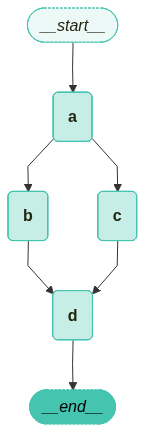

In [4]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(graph)

In [5]:
# 그래프 실행
graph.invoke({"aggregate": []}, {"configurable": {"thread_id": "foo"}})

Adding I'm A to []
Adding I'm B to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='13759788-10da-4917-9d08-5b2cb361152c')]
Adding I'm C to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='13759788-10da-4917-9d08-5b2cb361152c')]
Adding I'm D to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='13759788-10da-4917-9d08-5b2cb361152c'), HumanMessage(content="I'm B", additional_kwargs={}, response_metadata={}, id='7848de17-2960-458e-89d1-eb22bddc0289'), HumanMessage(content="I'm C", additional_kwargs={}, response_metadata={}, id='f6efe902-1ad8-4f7d-91f0-7f8918f0c90a')]


{'aggregate': [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='13759788-10da-4917-9d08-5b2cb361152c'),
  HumanMessage(content="I'm B", additional_kwargs={}, response_metadata={}, id='7848de17-2960-458e-89d1-eb22bddc0289'),
  HumanMessage(content="I'm C", additional_kwargs={}, response_metadata={}, id='f6efe902-1ad8-4f7d-91f0-7f8918f0c90a'),
  HumanMessage(content="I'm D", additional_kwargs={}, response_metadata={}, id='aac82fe2-62f1-41b4-a49d-d002f738b525')]}

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages


# 상태 정의(add_messages 리듀서 사용)
class State(TypedDict):
    aggregate: Annotated[list, add_messages]


# 노드 값 반환 클래스
class ReturnNodeValue:
    # 초기화
    def __init__(self, node_secret: str):
        self._value = node_secret

    # 호출시 상태 업데이트
    def __call__(self, state: State) -> Any:
        print(f"Adding {self._value} to {state['aggregate']}")
        return {"aggregate": [self._value]}


# 상태 그래프 초기화
builder = StateGraph(State)

# 노드 생성 및 연결
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_edge(START, "a")
builder.add_node("b1", ReturnNodeValue("I'm B1"))
builder.add_node("b2", ReturnNodeValue("I'm B2"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))
builder.add_edge("a", "b1")
builder.add_edge("a", "c")
builder.add_edge("b1", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)

# 그래프 컴파일
graph = builder.compile()

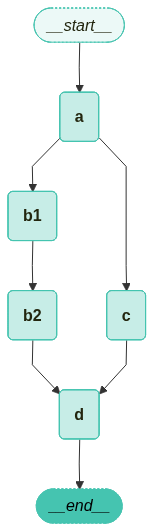

In [7]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(graph)

In [8]:
graph.invoke({"aggregate": []})

Adding I'm A to []
Adding I'm B1 to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='97e6e79e-a696-41d0-a0e5-3fe5edf46696')]
Adding I'm C to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='97e6e79e-a696-41d0-a0e5-3fe5edf46696')]
Adding I'm B2 to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='97e6e79e-a696-41d0-a0e5-3fe5edf46696'), HumanMessage(content="I'm B1", additional_kwargs={}, response_metadata={}, id='9c1319b3-5b52-495c-a73c-475346b0f8ce'), HumanMessage(content="I'm C", additional_kwargs={}, response_metadata={}, id='4bf23131-f145-4938-8e00-49891301aa62')]
Adding I'm D to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='97e6e79e-a696-41d0-a0e5-3fe5edf46696'), HumanMessage(content="I'm B1", additional_kwargs={}, response_metadata={}, id='9c1319b3-5b52-495c-a73c-475346b0f8ce'), HumanMessage(content="I'm C", additional_kwargs={}, response_metadata={}, id='4bf23

{'aggregate': [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='97e6e79e-a696-41d0-a0e5-3fe5edf46696'),
  HumanMessage(content="I'm B1", additional_kwargs={}, response_metadata={}, id='9c1319b3-5b52-495c-a73c-475346b0f8ce'),
  HumanMessage(content="I'm C", additional_kwargs={}, response_metadata={}, id='4bf23131-f145-4938-8e00-49891301aa62'),
  HumanMessage(content="I'm B2", additional_kwargs={}, response_metadata={}, id='616b0ce3-78b8-4fe3-8a5b-bcec58eef0ae'),
  HumanMessage(content="I'm D", additional_kwargs={}, response_metadata={}, id='58c88586-718b-4edb-a87a-e9043a480924')]}

In [9]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langgraph.graph import END, START, StateGraph


# 상태 정의(add_messages 리듀서 사용)
class State(TypedDict):
    aggregate: Annotated[list, add_messages]
    which: str


# 노드별 고유 값을 반환하는 클래스
class ReturnNodeValue:
    def __init__(self, node_secret: str):
        self._value = node_secret

    def __call__(self, state: State) -> Any:
        print(f"Adding {self._value} to {state['aggregate']}")
        return {"aggregate": [self._value]}


# 상태 그래프 초기화
builder = StateGraph(State)
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_edge(START, "a")
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))
builder.add_node("e", ReturnNodeValue("I'm E"))


# 상태의 'which' 값에 따른 조건부 라우팅 경로 결정 함수
def route_bc_or_cd(state: State) -> Sequence[str]:
    if state["which"] == "cd":
        return ["c", "d"]
    return ["b", "c"]


# 전체 병렬 처리할 노드 목록
intermediates = ["b", "c", "d"]

builder.add_conditional_edges(
    "a",
    route_bc_or_cd,
    intermediates,
)
for node in intermediates:
    builder.add_edge(node, "e")


# 최종 노드 연결 및 그래프 컴파일
builder.add_edge("e", END)
graph = builder.compile()

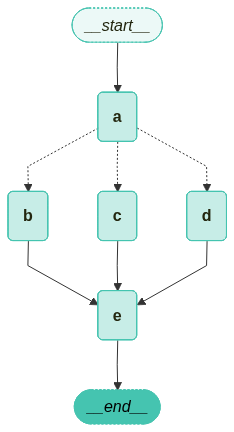

In [10]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(graph)

In [11]:
# 그래프 실행(which: bc 로 지정)
graph.invoke({"aggregate": [], "which": "bc"})

Adding I'm A to []
Adding I'm B to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='2aab485d-be6f-4fad-be42-3dc3cb3e319d')]
Adding I'm C to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='2aab485d-be6f-4fad-be42-3dc3cb3e319d')]
Adding I'm E to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='2aab485d-be6f-4fad-be42-3dc3cb3e319d'), HumanMessage(content="I'm B", additional_kwargs={}, response_metadata={}, id='84e8d285-b510-4059-a92e-f7bdb19c8a3b'), HumanMessage(content="I'm C", additional_kwargs={}, response_metadata={}, id='48d05cb0-f0e7-431f-9138-7853ec5bbf76')]


{'aggregate': [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='2aab485d-be6f-4fad-be42-3dc3cb3e319d'),
  HumanMessage(content="I'm B", additional_kwargs={}, response_metadata={}, id='84e8d285-b510-4059-a92e-f7bdb19c8a3b'),
  HumanMessage(content="I'm C", additional_kwargs={}, response_metadata={}, id='48d05cb0-f0e7-431f-9138-7853ec5bbf76'),
  HumanMessage(content="I'm E", additional_kwargs={}, response_metadata={}, id='dd6a46ab-3951-4d15-a26d-d5b9e30017da')],
 'which': 'bc'}

In [12]:
# 그래프 실행(which: cd 로 지정)
graph.invoke({"aggregate": [], "which": "cd"})

Adding I'm A to []
Adding I'm C to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='3c978389-01b9-460e-9a2b-25f2a0775654')]
Adding I'm D to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='3c978389-01b9-460e-9a2b-25f2a0775654')]
Adding I'm E to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='3c978389-01b9-460e-9a2b-25f2a0775654'), HumanMessage(content="I'm C", additional_kwargs={}, response_metadata={}, id='4b48b1a5-d226-475f-8868-b92ba329162e'), HumanMessage(content="I'm D", additional_kwargs={}, response_metadata={}, id='cdfda7d3-470b-43c4-bdee-49d3c170f793')]


{'aggregate': [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='3c978389-01b9-460e-9a2b-25f2a0775654'),
  HumanMessage(content="I'm C", additional_kwargs={}, response_metadata={}, id='4b48b1a5-d226-475f-8868-b92ba329162e'),
  HumanMessage(content="I'm D", additional_kwargs={}, response_metadata={}, id='cdfda7d3-470b-43c4-bdee-49d3c170f793'),
  HumanMessage(content="I'm E", additional_kwargs={}, response_metadata={}, id='3d99683e-30a7-40fc-bdca-4d3a0a8fc707')],
 'which': 'cd'}

In [13]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages


# 팬아웃 값들의 병합 로직 구현, 빈 리스트 처리 및 리스트 연결 수행
def reduce_fanouts(left, right):
    if left is None:
        left = []
    if not right:
        # 덮어쓰기
        return []
    return left + right


# 상태 관리를 위한 타입 정의, 집계 및 팬아웃 값 저장 구조 설정
class State(TypedDict):
    # add_messages 리듀서 사용
    aggregate: Annotated[list, add_messages]
    fanout_values: Annotated[list, reduce_fanouts]
    which: str


# 그래프 초기화
builder = StateGraph(State)
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_edge(START, "a")


# 병렬 노드 값 반환 클래스
class ParallelReturnNodeValue:
    def __init__(
        self,
        node_secret: str,
        reliability: float,
    ):
        self._value = node_secret
        self._reliability = reliability

    # 호출시 상태 업데이트
    def __call__(self, state: State) -> Any:
        print(f"Adding {self._value} to {state['aggregate']} in parallel.")
        return {
            "fanout_values": [
                {
                    "value": [self._value],
                    "reliability": self._reliability,
                }
            ]
        }


# 신뢰도(reliability)가 다른 병렬 노드들 추가
builder.add_node("b", ParallelReturnNodeValue("I'm B", reliability=0.1))
builder.add_node("c", ParallelReturnNodeValue("I'm C", reliability=0.9))
builder.add_node("d", ParallelReturnNodeValue("I'm D", reliability=0.5))


# 팬아웃 값들을 신뢰도 기준으로 정렬하고 최종 집계 수행
def aggregate_fanout_values(state: State) -> Any:
    # 신뢰도 기준 정렬
    ranked_values = sorted(
        state["fanout_values"], key=lambda x: x["reliability"], reverse=True
    )
    print(ranked_values)
    return {
        "aggregate": [x["value"][0] for x in ranked_values] + ["I'm E"],
        "fanout_values": [],
    }


# 집계 노드 추가
builder.add_node("e", aggregate_fanout_values)


# 상태에 따른 조건부 라우팅 로직 구현
def route_bc_or_cd(state: State) -> Sequence[str]:
    if state["which"] == "cd":
        return ["c", "d"]
    return ["b", "c"]


# 중간 노드들 설정 및 조건부 엣지 추가
intermediates = ["b", "c", "d"]
builder.add_conditional_edges("a", route_bc_or_cd, intermediates)

# 중간 노드들과 최종 집계 노드 연결
for node in intermediates:
    builder.add_edge(node, "e")

# 그래프 완성을 위한 최종
graph = builder.compile()

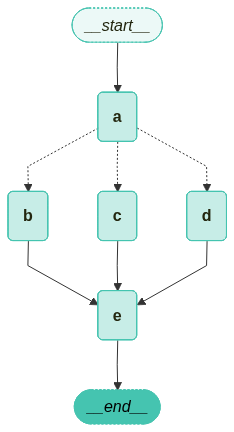

In [14]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(graph)

In [15]:
# 그래프 실행(which: bc 로 지정)
graph.invoke({"aggregate": [], "which": "bc", "fanout_values": []})

Adding I'm A to []
Adding I'm B to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='55b6a33b-7206-4fbe-850e-d7225e3828ae')] in parallel.
Adding I'm C to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='55b6a33b-7206-4fbe-850e-d7225e3828ae')] in parallel.
[{'value': ["I'm C"], 'reliability': 0.9}, {'value': ["I'm B"], 'reliability': 0.1}]


{'aggregate': [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='55b6a33b-7206-4fbe-850e-d7225e3828ae'),
  HumanMessage(content="I'm C", additional_kwargs={}, response_metadata={}, id='8ec9aa9e-56db-4076-804f-23b4038e391a'),
  HumanMessage(content="I'm B", additional_kwargs={}, response_metadata={}, id='77e96b13-424e-4477-aced-8245cb887df8'),
  HumanMessage(content="I'm E", additional_kwargs={}, response_metadata={}, id='41c566f9-8d3c-4e58-be6b-81f3ce8af639')],
 'fanout_values': [],
 'which': 'bc'}

In [16]:
# 그래프 실행(which: cd 로 지정)
graph.invoke({"aggregate": [], "which": "cd"})

Adding I'm A to []
Adding I'm C to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='a7b413db-e7e7-4982-9d57-6332d6e3834b')] in parallel.
Adding I'm D to [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='a7b413db-e7e7-4982-9d57-6332d6e3834b')] in parallel.
[{'value': ["I'm C"], 'reliability': 0.9}, {'value': ["I'm D"], 'reliability': 0.5}]


{'aggregate': [HumanMessage(content="I'm A", additional_kwargs={}, response_metadata={}, id='a7b413db-e7e7-4982-9d57-6332d6e3834b'),
  HumanMessage(content="I'm C", additional_kwargs={}, response_metadata={}, id='56382296-c514-4c98-9e2a-970428a59529'),
  HumanMessage(content="I'm D", additional_kwargs={}, response_metadata={}, id='0cabc0c9-fd9f-4a49-8e73-29ee4f4b660c'),
  HumanMessage(content="I'm E", additional_kwargs={}, response_metadata={}, id='fb99f6d5-a947-4bbb-bdaf-88b486a216ec')],
 'fanout_values': [],
 'which': 'cd'}